In [ ]:
# Margaret Johnston
# Homework 9 - due 25 April

# Homework

Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) e^{-t^2/50} \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)


I added an exponential envelope to the signal for aesthetic reasons.

In [1]:
from numpy import *
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   


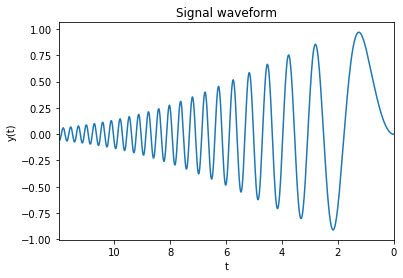

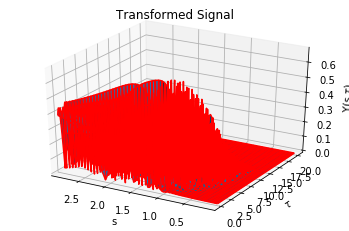

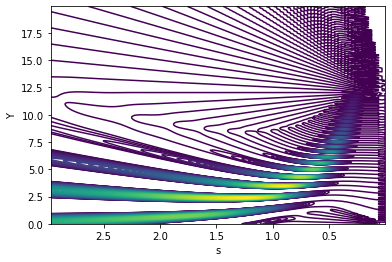

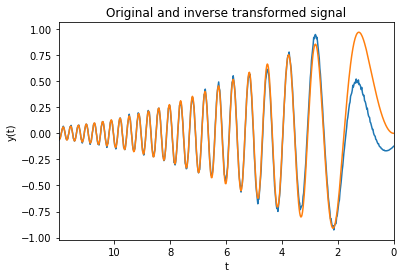

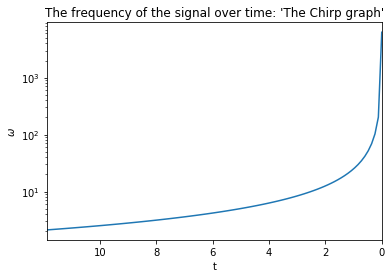

In [35]:
# setting up the arrays for calculation

# s array setup
ns=100
dstep=3./ns
sar=arange(0.001,3.001,dstep)

# tau array setup
ntau=300
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)

# Y(s,tau) array setup
ystau=zeros((ns, ntau),complex)

# time array setup
nt=600
dtstep=12./nt
tar=arange(0.,12.,dtstep)

# y(t) array setup
yarr=zeros(nt)
yarr2=zeros(nt,complex)

# omega array setup
omar=2*pi/sar
dtstep2=12./ns
tar2=arange(0.,12.,dtstep2)

# defining the signal
def func(t):
    return func3(t)

def func1(t):
    return(sin(2.*pi*t))

def func3(t):
    y=0.
    if(0<t and t<15):
        y=sin(t*t)*exp(-t*t/50)
    return y
    

def morlet(t,sigma):
    psi=sin(2.*pi*t)*exp(-t*t/2./sigma/sigma)
    return psi

def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep

def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.)*ystau[idexs,idextau]*dstep*dtaustep

# calling the transform and inverse transform
wavelet()
invwavelet(yarr2)


# figure for the original signal
fig = p.figure()
p.plot(tar,yarr)
p.title("Signal waveform")
p.xlabel("t")
p.ylabel("y(t)")
p.xlim([max(tar),min(tar)])
p.show()

# figure for the transform into s, tau
fig = p.figure()  
ax = fig.add_subplot(projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                    # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')     # Add wireframe
ax.set_title("Transformed Signal")
ax.set_xlabel('s')
ax.set_ylabel(r'$\tau$')
ax.set_zlabel(r'Y(s,$\tau$)')
p.xlim([max(sar),min(sar)])

fig = p.figure()  
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).real, levels=levels)
p.xlabel('s')
p.ylabel('Y')
p.xlim([max(sar),min(sar)])
p.show() 

# figure for original signal and inverse transformed signal
p.plot(tar,yarr2.real*2.2)
p.plot(tar,yarr)
p.title("Original and inverse transformed signal")
p.xlabel("t")
p.ylabel("y(t)")
p.xlim([max(tar),min(tar)])
p.show()

# figure for chirp
p.plot(tar2,omar)
p.title("The frequency of the signal over time: 'The Chirp graph'")
p.xlabel("t")
p.ylabel(r"$\omega$")
p.yscale("log")
p.xlim([max(tar2),min(tar2)])
p.show()